# Stochastic vs. Monte-Carlo Solver: Cat states become coherent

$\newcommand{\ket}[1]{| #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$
$\newcommand{\braket}[1]{\langle #1 \rangle}$
$\newcommand{\CC}{\mathcal{C}}$
Author: F. Minganti (minganti@riken.jp)

In this notebook we show how the same system can produce extremely different results according to the way an observer collects the emitted field of a resonator. This notebook closely follows the results obtained in Refs. [1-3].

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (
    about,
    destroy,
    expect,
    fock,
    mcsolve,
    ssesolve,
    steadystate,
    wigner,
)

## The two-photon Kerr Resontator

Let us consider a single nonlinear Kerr resonator subject 
to a parametric two-photon driving.
In a frame rotating at the pump frequency, the Hamiltonian reads
\begin{equation}\label{Eq:Hamiltonian}
\hat{H}
=\frac{U}{2}\,\hat{a}^\dagger\hat{a}^\dagger\hat{a}\hat{a}
+\frac{G}{2}\left(\hat{a}^\dagger\hat{a}^\dagger+\hat{a}\hat{a}\right),
\end{equation}
where $U$ is the Kerr photon-photon interaction strength, $G$ is the two-photon driving amplitude, and $\hat{a}^\dagger$ ($\hat{a}$) is the bosonic creation (annihilation) operator.

![cavity-1.png](images/cavity-1.png "The system under consideration is a single Kerr resonator, with parametric drive and one- and two-photon dissipation.")

The time dynamics  of the density matrix $\hat{\rho}$ of this sytem is given by a Lindblad master equation $i \partial_t \hat{\rho} = \mathcal{L} \hat{\rho}$, where $\mathcal{L}$ is the Liouvillian superoperator.
The superoperator $\mathcal{L}$ is made of an Hamiltonian part and 
a non-hermitian contribution, which describe the dissipation of energy, particle and information into the environment,  as detailed 
in e.g. [5].

Given the parametric drive, the dissipation processes include one- and two-photon dissipation, and the Lindblad superoperator become
\begin{equation}\label{Eq:Lindblad}
\mathcal{L} \hat{\rho} = - i \left[\hat{H},\hat{\rho}\right]
+\frac{\gamma}{2} \left(2\hat{a}\hat{\rho}\hat{a}^\dagger
-\hat{a}^\dagger\hat{a}\hat{\rho}
-\hat{\rho}\hat{a}^\dagger\hat{a}\right)
+ \, \frac{\eta}{2} \left(2\hat{a}\hat{a}\hat{\rho}\hat{a}^\dagger\hat{a}^\dagger
-\hat{a}^\dagger\hat{a}^\dagger\hat{a}\hat{a}\hat{\rho}
-\hat{\rho}\hat{a}^\dagger\hat{a}^\dagger\hat{a}\hat{a}\right),
\end{equation}
where $\gamma$ and $\eta$ are, respectively, the one- and two-photon dissipation rates.

We define the system parameters in the following cells. 

In [2]:
font_size = 20
label_size = 30
title_font = 35

In [3]:
a = destroy(20)
U = 1
G = 4
gamma = 1
eta = 1
H = U * a.dag() * a.dag() * a * a + G * (a * a + a.dag() * a.dag())
c_ops = [np.sqrt(gamma) * a, np.sqrt(eta) * a * a]

parity = 1.0j * np.pi * a.dag() * a
parity = parity.expm()

rho_ss = steadystate(H, c_ops)

This model can be solved exactly for its steady state [2,3].
The corresponding density matrix $\hat{\rho}_{\rm ss}$ is well approximated by the statistical mixture of two orthogonal states:
\begin{equation}\label{Eq:MixtureCats}
\hat{\rho}_{\rm ss}\simeq
p^+\,\ket{\CC^+_\alpha}\!\bra{\CC^+_\alpha}
+p^-\,\ket{\CC^-_\alpha}\!\bra{\CC^-_\alpha},
\end{equation}
where $\ket{\CC^\pm_\alpha}\propto\ket{\alpha}\pm\ket{-\alpha}$ are photonic Schrödinger cat states whose complex amplitude $\alpha$ is determined by the system parameters [2-4].
We recall that the coherent state $\ket{\alpha}$ is the eigenstate of the destruction operator: $\hat{a} \ket{\alpha}=\alpha \ket{\alpha}$.
The state $\ket{\CC^+_\alpha}$ is called the even cat, since it can be written as a superposition of solely even Fock states, while $\ket{\CC^-_\alpha}$ is the odd cat. 
In the previous equation, the coefficients $p^\pm$ can be interpreted as the probabilities of the system of being found in the corresponding cat state.

Below, we demonstrate this feature by diagonalising the steady-state density matrix, and by plotting the photon-number probability for the two most probable states.

The mean number of photon is 3.460600204155397


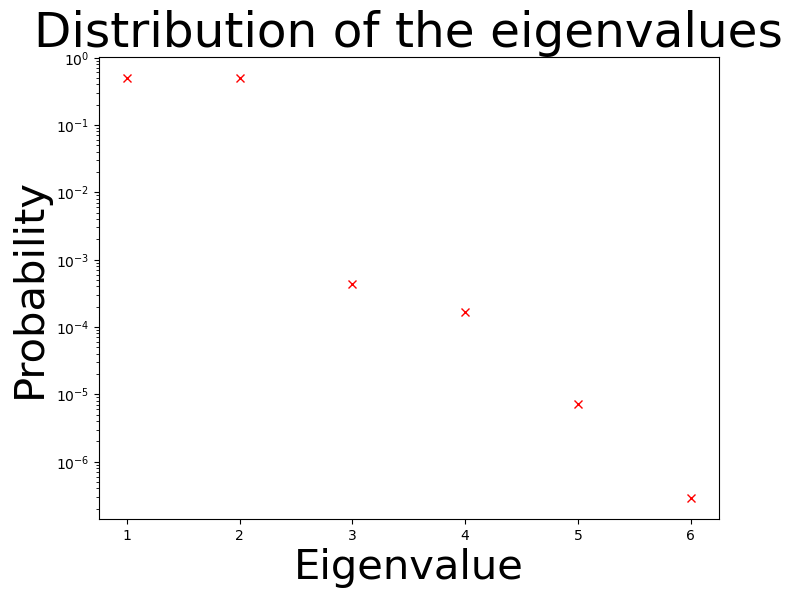

In [4]:
vals, vecs = rho_ss.eigenstates(sort="high")
print("The mean number of photon is " + str(expect(a.dag() * a, rho_ss)))

plt.figure(figsize=(8, 6))
plt.semilogy(range(1, 7), vals[0:6], "rx")
plt.xlabel("Eigenvalue", fontsize=label_size)
plt.ylabel("Probability", fontsize=label_size)
plt.title("Distribution of the eigenvalues", fontsize=title_font)
plt.show()

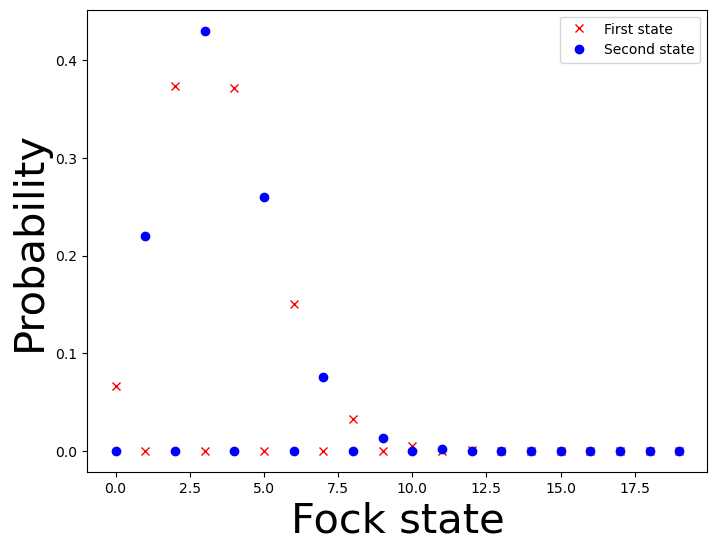

In [5]:
state_zero = vecs[0].full()
state_one = vecs[1].full()


plt.figure(figsize=(8, 6))
plt.plot(
    range(0, 20),
    [abs(i) ** 2 for i in state_zero[0:20]],
    "rx",
    label="First state",
)
plt.plot(
    range(0, 20),
    [abs(i) ** 2 for i in state_one[0:20]],
    "bo",
    label="Second state",
)
plt.legend()
plt.xlabel("Fock state", fontsize=label_size)
plt.ylabel("Probability", fontsize=label_size)
plt.show()

Correctly, the two system have opposite parity. Indeed, for sufficiently intense pumping ($G> U,\gamma,\eta$ and $|\alpha|\gg1$), it was shown in [2] that  $p^+\simeq p^- \simeq 1/2$.
However, in this strong-pumping regime, the steady-state can be recast as
\begin{equation}\label{Eq:MixtureCoherent}
\hat{\rho}_{\rm ss}\simeq
\frac{1}{2}\ket{\alpha}\!\bra{\alpha}
+\frac{1}{2}\ket{-\alpha}\!\bra{-\alpha}.
\end{equation}
Hence, the steady state can be seen as well as a statistical mixture of two coherent states of opposite phase.
Since $\hat{\rho}_{\rm ss}$ is anyhow a mixture of two (quasi-)orthogonal states, the steady state is bimodal. 
Such a bimodality can be visualised, for instance, through the Wigner function [2,3].
Now, the pivotal question is:  if one monitors the evolution of the system, in which states can it be observed?
The orthogonal cat states, the two coherent states with opposite phases, or none of them in particular?
As we will show in the following, the answer dramatically depends on the type of measurement scheme employed to monitor the trajectory of the system.

In [6]:
xvec = np.linspace(-4, 4, 500)
W_even = wigner(vecs[0], xvec, xvec, g=2)
W_odd = wigner(vecs[1], xvec, xvec, g=2)

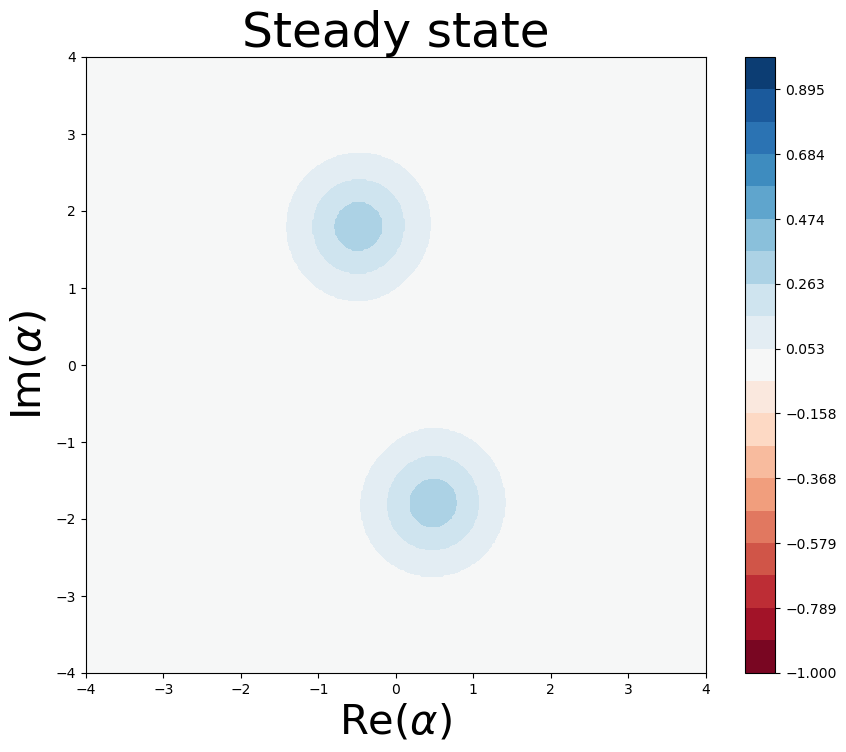

In [7]:
W_ss = wigner(rho_ss, xvec, xvec, g=2)
W_ss = np.around(W_ss, decimals=2)
plt.figure(figsize=(10, 8))

plt.contourf(xvec, xvec, W_ss, cmap="RdBu", levels=np.linspace(-1, 1, 20))
plt.colorbar()
plt.xlabel(r"Re$(\alpha)$", fontsize=label_size)
plt.ylabel(r"Im$(\alpha)$", fontsize=label_size)
plt.title("Steady state", fontsize=title_font)
plt.show()

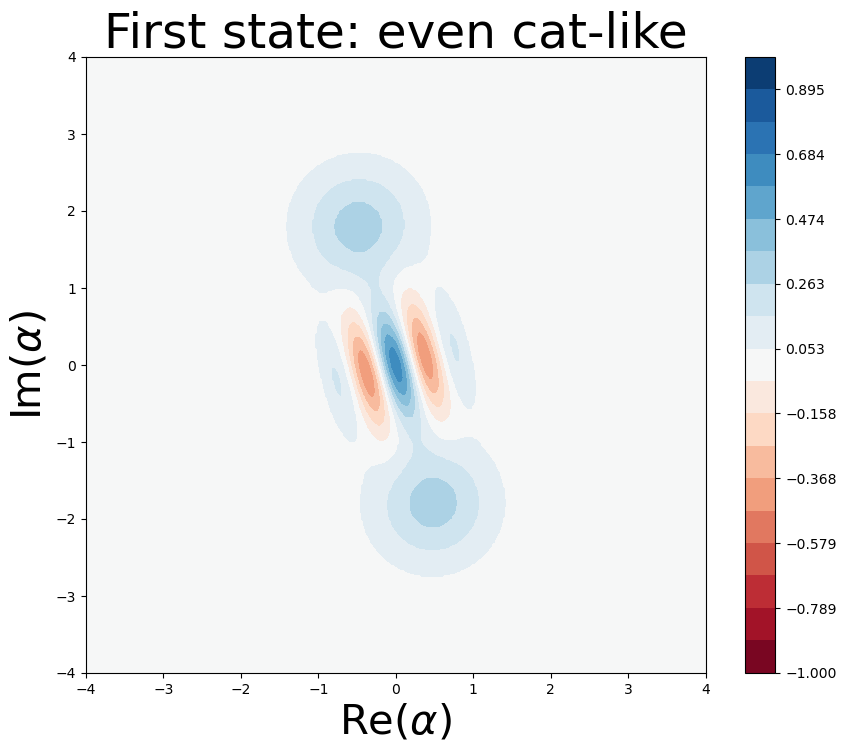

In [8]:
W_even = np.around(W_even, decimals=2)
plt.figure(figsize=(10, 8))
plt.contourf(xvec, xvec, W_even, cmap="RdBu", levels=np.linspace(-1, 1, 20))
plt.colorbar()
plt.xlabel(r"Re$(\alpha)$", fontsize=label_size)
plt.ylabel(r"Im$(\alpha)$", fontsize=label_size)
plt.title("First state: even cat-like", fontsize=title_font)
plt.show()

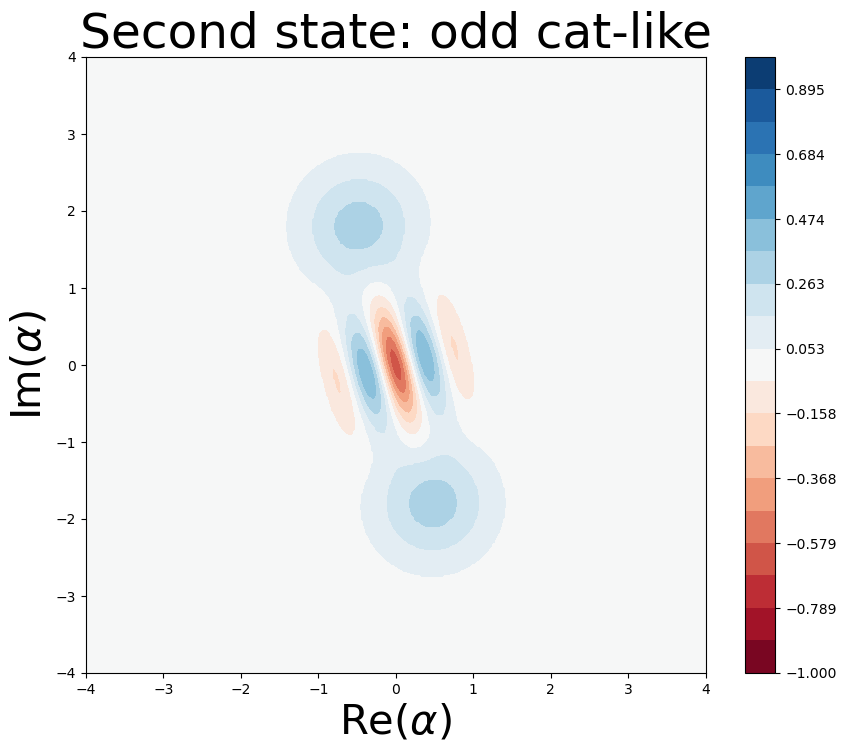

In [9]:
W_odd = np.around(W_odd, decimals=2)
plt.figure(figsize=(10, 8))

plt.contourf(xvec, xvec, W_odd, cmap="RdBu", levels=np.linspace(-1, 1, 20))
plt.colorbar()
plt.xlabel(r"Re$(\alpha)$", fontsize=label_size)
plt.ylabel(r"Im$(\alpha)$", fontsize=label_size)
plt.title("Second state: odd cat-like", fontsize=title_font)
plt.show()

## Quantum Trajectories
From a theoretical point of view, the Lindblad master equation describes the out-of-equilibrium dynamics of a system coupled to a Markovian (i.e., memoryless) environment.
Indeed, the density matrix $\hat{\rho}(t)$ solving the Lindblad equation encodes the average evolution of the system when no information is collected about environment state.
However, one can imagine to keep track of the system state by continuously probing the environment.
	Doing so, the time evolution of the system would change at each realisation.
	However, $\hat{\rho}(t)$ can be retrieved by averaging over an infinite number of such "monitored" realisations.
    The Monte Carlo wavefunction method has been developed relying exactly on this idea.
	It is based on the stochastic simulation of the system evolution when one continuously gathers information from the environment.
Each simulation of the stochastic evolution of the system gives a single quantum trajectory.
The results obtained by solving the master equation are recovered by averaging over many trajectories.
In order to simulate the quantum trajectories, it is necessary  to explicitly model how an observer measures the environment, thus affecting the system evolution itself (a detailed  discussion on this subject is given in [5].
Interestingly, several different measures can be associated with the same master equation.
Depending on the chosen measurement, contrasting results and interpretations can emerge.
Those incompatibilities are, however, harmonized once the mean value over many trajectories is taken.

![measure_type-1.png](images/measure_type-1.png "Homodyne measure (left): the optut field is detected after being mixed with that of a local osillator. Photon counting (right): each photon escaping the cavity is detected by a photon counter.")

$\newcommand{\ket}[1]{| #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$
$\newcommand{\CC}{\mathcal{C}}$
### Photon counting

The most natural way to observe the exchanges between the Kerr resonator and the environment is to just detect every leaked photon (both individually and by couples).
This mechanism is described via the action of the one-photon jump operator $\hat{J}_1=\sqrt{\gamma}\, \hat{a}$ and the two-photon one $\hat{J}_2=\sqrt{\eta}\, \hat{a}^2$, which describe the absorption of one or two photons by an ideal photodetector (details in e.g. [6]).
Indeed, in typical realisations (e.g. [4]) the one- and two-photon dissipation channels are discernible.
Hence, we can assume that the photodetector is capable of distinguishing between one- and two-photon losses.
The photon-counting trajectory is then obtained by using the "mcsolve" function of qutip. 
In conclusion, a photon-counting trajectory is characterised by abrupt jumps corresponding to the projective measure associated to the detection of one or two photons.


In [10]:
tlist = np.linspace(0, 20, 2000)

sol_mc = mcsolve(
    H,
    fock(20, 0),
    tlist,
    c_ops,
    [a.dag() * a, (a + a.dag()) / 2, -1.0j * (a - a.dag()) / 2, parity],
    ntraj=1,
)

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


Total run time:   0.10s


/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


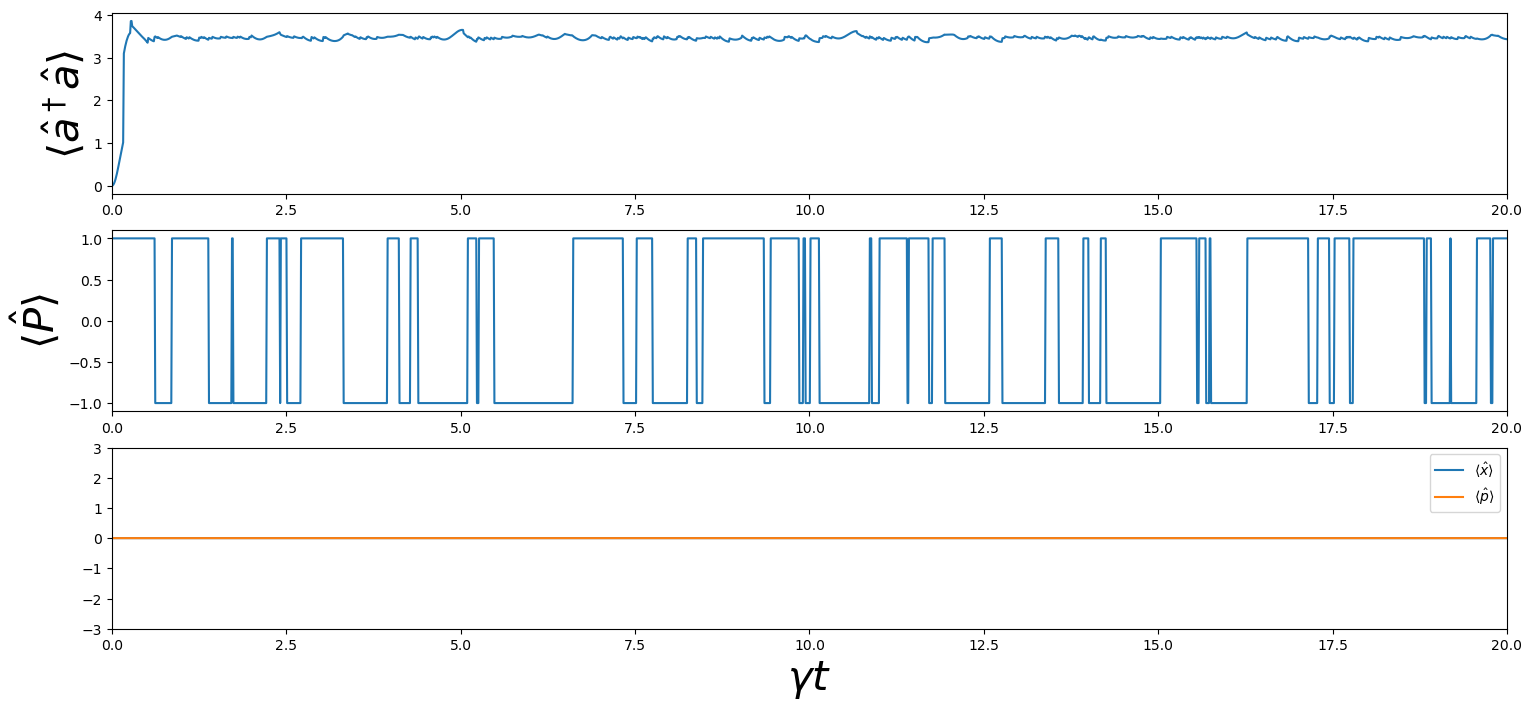

In [11]:
plt.figure(figsize=(18, 8))
plt.subplot(311)
plt.plot(tlist, sol_mc.expect[0])
plt.ylabel(r"$\langle \hat{a}^\dagger \hat{a} \rangle$", fontsize=label_size)
plt.xlim([0, 20])
plt.subplot(312)
plt.plot(tlist, sol_mc.expect[3])
plt.ylabel(r"$\langle \hat{P} \rangle$", fontsize=label_size)
plt.xlim([0, 20])
plt.subplot(313)
plt.plot(tlist, sol_mc.expect[1], label=r"$\langle \hat{x} \rangle$")
plt.plot(tlist, sol_mc.expect[2], label=r"$\langle \hat{p} \rangle$")
plt.xlabel(r"$\gamma t$", fontsize=label_size)
plt.xlim([0, 20])
plt.ylim([-3, 3])
plt.legend()
plt.show()

As shown in [2], the Hamiltonian $\hat{H}$ and the two-photon dissipation tend to stabilize photonic cat states.
On the other hand, the annihilation operator switches from the even (odd) cat to the odd (even) one:  $\hat{a}\ket{\CC^\pm_\alpha} \propto \alpha \ket{\CC^\mp_\alpha}$.
The operator $\hat{J}_1$ thus induces jumps between the two cat states at a rate proportional to $\gamma \braket{\hat{a}^\dagger \hat{a}}$.
This picture is very well captured in the framework of photon-counting trajectories, an example of which is given in the previous figure.
The cat states are, indeed, orthogonal eigenstates of the parity operator $\hat{\mathcal{P}}=e^{i \pi \hat{a}^\dagger \hat{a}}$ with eigenvalues $\pm1$.
As we can see, along a single trajectory the state intermittently and randomly switches between the two cat states.
We stress that, instead, the mean values of the field quadratures $\hat{x}=\left(\hat{a}^\dagger+\hat{a}\right)/2$ and $\hat{p}=i\left(\hat{a}^\dagger-\hat{a}\right)/2$ are practically zero along the trajectory, as expected for any cat state.
The parity, hence, appears to be the appropriate observable to detect a bimodal behaviour in a photon-counting environment.
Thus, we may interpret 
$$\hat{\rho}_{\rm ss}\simeq
p^+\,\ket{\CC^+_\alpha}\!\bra{\CC^+_\alpha}
+p^-\,\ket{\CC^-_\alpha}\!\bra{\CC^-_\alpha}$$
as the steady-state probabilities to find the system in one of the two cat states.

The previous analysis seems to point in the direction of privileging the cat states over the coherent ones as the more truthful picture of the steady state.

### Homodyne

Another possible way to monitor a quantum-optical system is through homodyne detection, a widely-used experimental technique which allows to access the field quadratures [5-6].
To implement this kind of measurement, the cavity output field is mixed to the coherent field of a reference laser through a beam splitter (here assumed of perfect transmittance).
Then, the mixed fields are probed via (perfect) photodectors, whose measures are described by new jump operators.
We stress that both the coherent and the cavity fields are measured simultaneously.

In our case, we want to probe independently the two dissipation channels.
To distinguish between one- and two-photon losses, one can exploit a nonlinear element acting on the cavity output field.
Indeed, in experimental realisations such as [4], a nonlinear element is already part of the system and is the key ingredient to realise two-photon processes.
More specifically, one-photon losses are due to the finite quality factor of the resonator.
They can be probed by directly mixing the output field of the cavity with a coherent beam of amplitude $\beta_1$ acting as local oscillator.
Therefore, the homodyne jump operator for one-photon losses can be cast as $\hat{K}_1=\hat{J}_1 +\beta_1 \hat{1}$.
Two-photon losses are, instead, mediated by a nonlinear element (a Josephson junction in [4]), which converts two cavity photons of frequency $\omega_c$ into one photon of frequency $\omega_{nl}$. Hence, the field coming out of the nonlinear element can be probed by a second independent oscillator.
This whole process can be seen as the action of a nonlinear beam splitter which mixes couples of dissipated photons with a reference oscillator of amplitude $\beta_2$.
Therefore, the homodyne two-photon jump operator takes the form $\hat{K}_2=\hat{J}_2 +\beta_2 \hat{1}$.
Without loss of generality, in the following, we assume the amplitudes $\beta_{1,2}$ to be real [6].

In the ideal limit $\beta_{1,2}\to\infty$, the system evolves diffusively according to a homodyne stochastic Schrödinger equation.
Using the ssesolve function with option "method='homodyne'", one can simulate the trajectory.

In [12]:
tlist = np.linspace(1000, 1200, 201)

sol_hom = ssesolve(
    H,
    fock(20, 0),
    tlist,
    sc_ops=c_ops,
    e_ops=[a.dag() * a, (a + a.dag()) / 2, -1.0j * (a - a.dag()) / 2, parity],
    ntraj=1,
    options={
        "dt": 0.0005,
        "store_measurement": False,
        "method": "platen",
        "progress_bar": False,
    },
    seeds=5,
)

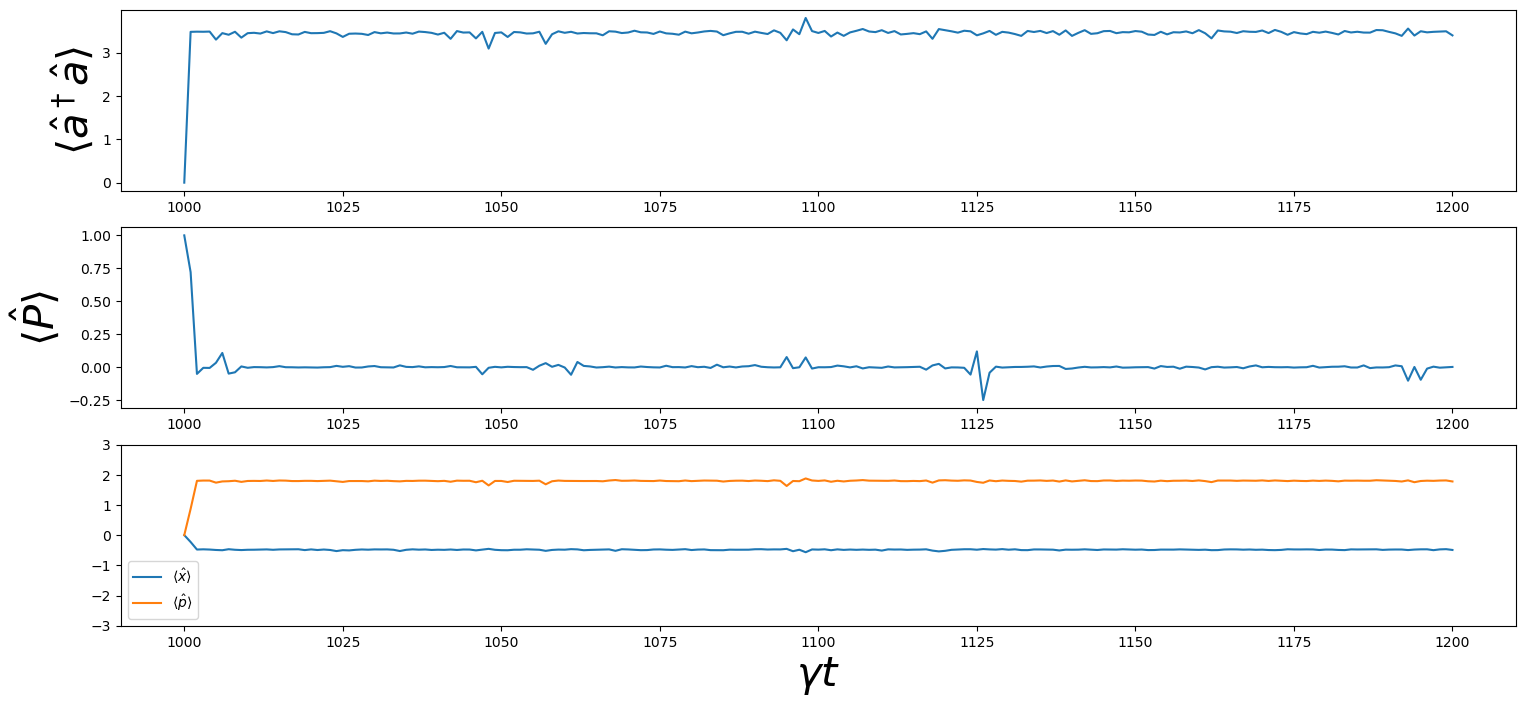

In [13]:
plt.figure(figsize=(18, 8))
plt.subplot(311)
plt.plot(tlist, sol_hom.expect[0])
plt.ylabel(r"$\langle \hat{a}^\dagger \hat{a} \rangle$", fontsize=label_size)
# plt.xlim([0,8000])
plt.subplot(312)
plt.plot(tlist, sol_hom.expect[3])
plt.ylabel(r"$\langle \hat{P} \rangle$", fontsize=label_size)
# plt.xlim([0,8000])
plt.subplot(313)
plt.plot(tlist, sol_hom.expect[1], label=r"$\langle \hat{x} \rangle$")
plt.plot(tlist, sol_hom.expect[2], label=r"$\langle \hat{p} \rangle$")
plt.xlabel(r"$\gamma t$", fontsize=label_size)
# plt.xlim([0,8000])
plt.ylim([-3, 3])
plt.legend()
plt.show()

We see that the mean parity $\braket{\hat{\mathcal{P}}}$
is confined around zero along a single homodyne trajectory, in spite of the 
"switching cat" picture.
These fluctuations are due to the diffusive nature of the homodyne trajectory, which rules 
the stochastic time evolution of the system wave function under homodyne detection.

The bimodal behaviour, instead, is clear in the time evolution of $\braket{\hat{x}}$ and $\braket{\hat{p}}$.
This appears compatible with the picture given by 
$\hat{\rho}_{\rm ss}\simeq
\frac{1}{2}\ket{\alpha}\!\bra{\alpha}
+\frac{1}{2}\ket{-\alpha}\!\bra{-\alpha}$: at the steady state the system switches between the coherent states $\ket{\pm\alpha}$.
We point out that the phase switches observed for homodyne trajectories have a much smaller rate than parity
switches in photon-counting trajectories. This is a consequence of the metastable nature of the 
coherent states $\ket{\pm\alpha}$ [1-4].

# Reconciling the two points of view

Summing up, we have shown that the behaviour of the system along a single quantum trajectory dramatically depends on the measurement protocol adopted.
For photon-counting measurements on the environment, the system switches between the parity-defined cat states, while under homodyne detection, the states explored along a single quantum trajectory are the coherent ones.

In other words, one may assign a physical meaning to the probabilities appearing in the mixed-state representation of $\hat{\rho}_{\rm ss}$ only upon specification of the single-trajectory protocol.
However, any possible controversy at the single-trajectory level is washed out by averaging over many of them.

In [14]:
tlist = np.linspace(0, 3, 91)
sol_mc_mean = mcsolve(
    H,
    fock(20, 0),
    tlist,
    c_ops,
    [a.dag() * a, (a + a.dag()) / 2, -1.0j * (a - a.dag()) / 2, parity],
    ntraj=50,
)

options = {
    "dt": 0.0001,
    "store_measurement": False,
    "method": "platen",
    "map": "parallel",
}

sol_hom_mean = ssesolve(
    H,
    fock(20, 0),
    tlist,
    sc_ops=c_ops,
    e_ops=[a.dag() * a, (a + a.dag()) / 2, -1.0j * (a - a.dag()) / 2, parity],
    ntraj=50,
    options=options,
)

10.0%. Run time:   0.04s. Est. time left: 00:00:00:00


20.0%. Run time:   0.09s. Est. time left: 00:00:00:00


30.0%. Run time:   0.15s. Est. time left: 00:00:00:00


40.0%. Run time:   0.20s. Est. time left: 00:00:00:00


50.0%. Run time:   0.25s. Est. time left: 00:00:00:00


60.0%. Run time:   0.31s. Est. time left: 00:00:00:00


70.0%. Run time:   0.36s. Est. time left: 00:00:00:00


80.0%. Run time:   0.41s. Est. time left: 00:00:00:00


90.0%. Run time:   0.46s. Est. time left: 00:00:00:00


100.0%. Run time:   0.52s. Est. time left: 00:00:00:00


Total run time:   0.53s


10.0%. Run time:   4.33s. Est. time left: 00:00:00:39


20.0%. Run time:   6.54s. Est. time left: 00:00:00:26


30.0%. Run time:   8.75s. Est. time left: 00:00:00:20


40.0%. Run time:  10.96s. Est. time left: 00:00:00:16


50.0%. Run time:  15.32s. Est. time left: 00:00:00:15


60.0%. Run time:  17.54s. Est. time left: 00:00:00:11


70.0%. Run time:  19.77s. Est. time left: 00:00:00:08


80.0%. Run time:  21.98s. Est. time left: 00:00:00:05


90.0%. Run time:  26.31s. Est. time left: 00:00:00:02


100.0%. Run time:  27.52s. Est. time left: 00:00:00:00


Total run time:  27.53s


(-2.0, 2.0)

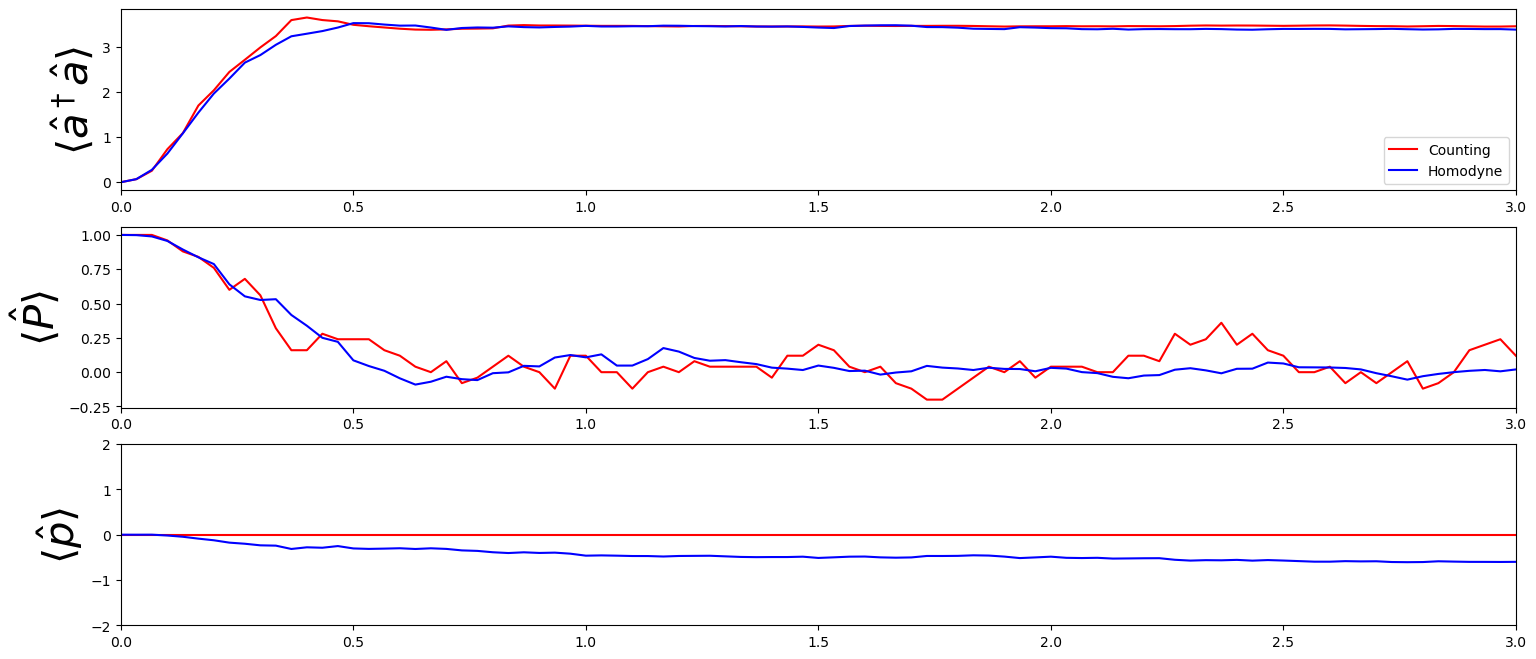

In [15]:
plt.figure(figsize=(18, 8))
plt.subplot(311)
plt.plot(tlist, sol_mc_mean.expect[0], "r", label="Counting")
plt.plot(tlist, sol_hom_mean.expect[0], "b", label="Homodyne")
plt.ylabel(r"$\langle \hat{a}^\dagger \hat{a} \rangle$", fontsize=label_size)
plt.xlim([0, 3])
plt.legend()
plt.subplot(312)
plt.plot(tlist, sol_mc_mean.expect[3], "r")
plt.plot(tlist, sol_hom_mean.expect[3], "b")
plt.ylabel(r"$\langle \hat{P} \rangle$", fontsize=label_size)
plt.xlim([0, 3])
plt.subplot(313)
plt.plot(tlist, sol_mc_mean.expect[2], "r")
plt.plot(tlist, sol_hom_mean.expect[2], "b")
plt.ylabel(r"$\langle \hat{p} \rangle$", fontsize=label_size)
plt.xlim([0, 3])
plt.ylim([-2, 2])

## References


[1] N. Bartolo, F. Minganti 1 , J. Lolli, and C. Ciuti,
Homodyne versus photon-counting quantum trajectories for dissipative Kerr resonators
with two-photon driving, The European Physical Journal Special Topics 226, 2705 (2017).
The European Physical Journal Special Topics 226, 2705 (2017).

[2] F. Minganti, N. Bartolo, J. Lolli, W. Casteels, and C. Ciuti,
Exact results for Schrödinger cats in driven-dissipative systems and their feedback control, Scientific Reports 6, 26987 (2016).

[3] N. Bartolo, F. Minganti, W. Casteels, and C. Ciuti,
Exact steady state of a Kerr resonator with one- and two-photon driving and dissipation: Controllable Wigner-function multimodality and dissipative phase transitions, Physical Review A 94, 033841 (2016).

[4] Z. Leghtas et al., Confining the state of light to a quantum manifold by
engineered two-photon loss, Science 347, 853 (2015).

[5] S. Haroche and J. M. Raimond, Exploring the Quantum: Atoms, Cavities, and Photons
(Oxford University Press, 2006).

[6] H. Wiseman and G. Milburn, Quantum Measurement and Control (Cambridge University Press, 2010).

In [16]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
